In [5]:
import numpy as np
import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

In [6]:
import numpy as np
import math

def weighted_l2_norm(k, F):
    return np.sqrt((F[0]/k[0])**2 + (F[1]/k[1])**2)

def newton_fedorenko_with_optimal_step(
    f1, df1dx, df1dy,
    f2, df2dx, df2dy,
    exact_solution, initial_guess, max_iter=100, tolerance=1e-6, num_fed_iter=100
):
    x_exact, y_exact = exact_solution
    x, y = initial_guess

    diffs = []

    for iteration in range(max_iter):
        dF1dx, dF1dy = df1dx(x, y), df1dy(x, y)
        dF2dx, dF2dy = df2dx(x, y), df2dy(x, y)

        k1 = math.sqrt(dF1dx**2 + dF1dy**2)
        k2 = math.sqrt(dF2dx**2 + dF2dy**2)
        k = np.array([k1, k2])

        F1 = f1(x, y)
        F2 = f2(x, y)
        F = np.array([F1, F2])
        F_scaled = F / k

        J = np.array([
            [dF1dx/k1, dF1dy/k1],
            [dF2dx/k2, dF2dy/k2]
        ])

        epsilon_n = 1
        for fed_iter in range(num_fed_iter):
            try:
                delta = np.linalg.solve(J, -F_scaled * epsilon_n)
                x_new = x + delta[0]
                y_new = y + delta[1]

                F_new = np.array([f1(x_new, y_new), f2(x_new, y_new)])
                if weighted_l2_norm(k, F_new) < weighted_l2_norm(k, F):
                    break
                else:
                    epsilon_n /= 2
            except np.linalg.LinAlgError:
                print(f"Singular in {iteration}.")
                break

        diff = np.sqrt((x_new - x_exact)**2 + (y_new - y_exact)**2)
        diffs.append(diff)
        print(f"Iteration {iteration + 1}: abs(new - ans) = {diff}")

        if diff < tolerance:
            return (x_new, y_new), diffs
        x, y = x_new, y_new

    return (x, y), diffs

In [7]:
# def f(x):
#     return np.array([f1(x[0], x[1]), f2(x[0], x[1])])
# from scipy.optimize import newton
# print(newton(f, np.array([1, 1])))

Test 1

In [8]:
def f1(x, y):
    return x ** 5 + y ** 4 - 2

def df1dx(x, y):
    return 5 * x ** 4
def df1dy(x, y):
    return 4 * y ** 3

def f2(x, y):
    return (x - 2) ** 3 + (y - 2) ** 3 + 16

def df2dx(x, y):
    return 3 * (x - 2) ** 2
def df2dy(x, y):
    return 3 * (y - 2) ** 2

exact_solution = (1.14220308, -0.4862617)
initial_guess = (1, 1)
max_iter = 50

root, diffs = newton_fedorenko_with_optimal_step(
    f1, df1dx, df1dy,
    f2, df2dx, df2dy,
    exact_solution, initial_guess, max_iter
)

print(f"New: {root}")
print(f"Ans: {exact_solution}")

Iteration 1: abs(new - ans) = 0.8762355789991251
Iteration 2: abs(new - ans) = 0.4683265559967004
Iteration 3: abs(new - ans) = 0.10160201460630548
Iteration 4: abs(new - ans) = 0.010078146381928381
Iteration 5: abs(new - ans) = 0.00015945084370083145
Iteration 6: abs(new - ans) = 4.115727366718454e-08
New: (np.float64(1.1422031211560248), np.float64(-0.48626170032062055))
Ans: (1.14220308, -0.4862617)


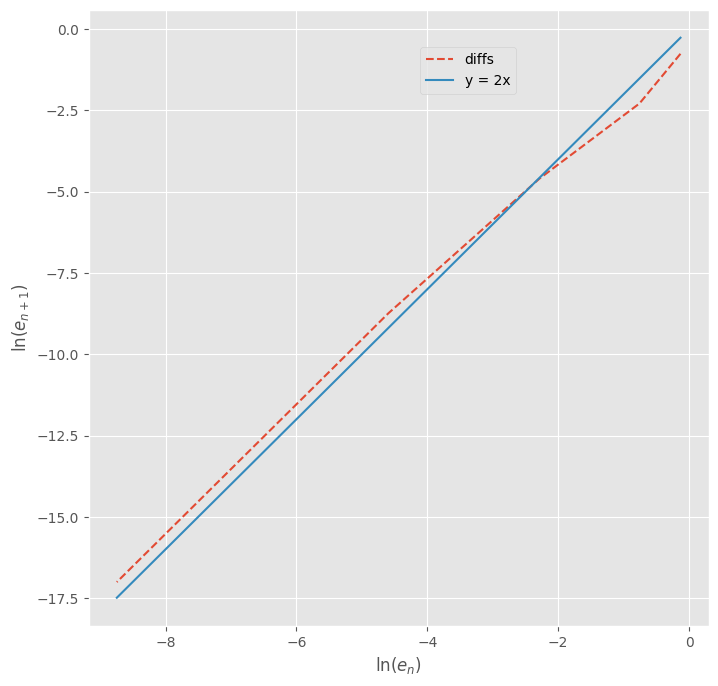

In [9]:
ln_e_n = np.log(np.array(diffs[:-1]))
ln_e_n_1 = np.log(np.array(diffs[1:]))
order = 2

plt.figure(figsize=(8, 8))

plt.plot(ln_e_n, ln_e_n_1, "--", label='diffs')
plt.plot(ln_e_n, order * ln_e_n, label=f'y = {order}x')

plt.xlabel(r"$\ln(e_n)$")
plt.ylabel(r"$\ln(e_{n+1})$")

plt.legend(loc='upper right', bbox_to_anchor=(0.7, 0.95))

plt.show()